Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

Answer:
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that makes predictions based on the similarity of data points.

How it works:

For a new data point, KNN finds the K closest points (neighbors) in the training dataset using a distance metric (like Euclidean distance).

The prediction is then based on these neighbors.

Classification:
The algorithm assigns the class that is most frequent among the K nearest neighbors (majority voting).

Regression:
The algorithm predicts the target value by taking the average (or weighted average) of the K nearest neighbors’ values.

In short, KNN assumes that similar data points exist close to each other in feature space.

Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?

Answer:
The Curse of Dimensionality refers to problems that arise when data has too many features (high dimensions). As dimensions increase:

Data points become more sparse and spread out.

The notion of distance loses meaning (all points start to appear equally far from each other).

More data is required to cover the feature space properly.

Effect on KNN:

Since KNN relies on distance to find neighbors, in high dimensions the neighbors may not be truly “close.”

This leads to poor classification/regression accuracy.

KNN becomes computationally expensive as distance calculations increase with dimensions.

Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?

Answer: Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique that transforms the original features into a smaller set of new features called principal components. These components are linear combinations of the original variables and are chosen to capture the maximum variance in the data.

The first component captures the most variance, the second captures the next most (while being uncorrelated with the first), and so on.

Difference from Feature Selection:

PCA creates new transformed features (principal components) from the original ones, which may not have direct real-world meaning.

Feature selection keeps a subset of the original features, removing the less important ones while preserving interpretability.

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?


Answer: In PCA, eigenvalues and eigenvectors come from the covariance matrix of the data:

Eigenvectors:
They represent the directions (principal components) along which the data varies the most. Each eigenvector is a new axis in the transformed feature space.

Eigenvalues:
They indicate the amount of variance captured by each eigenvector. A larger eigenvalue means that component explains more of the data’s variability.

Why important:

Eigenvectors define the orientation of the new feature space.

Eigenvalues tell us how much information (variance) each principal component carries.

By ranking eigenvalues, we can decide how many components to keep (dimensionality reduction).

Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?


Answer:KNN and PCA complement each other in this way:

Problem with KNN: It struggles in high-dimensional data (curse of dimensionality) because distance metrics become less meaningful.

Role of PCA: PCA reduces the number of dimensions by projecting data onto fewer principal components that retain most of the variance.

When combined in a pipeline:

PCA reduces noise, removes redundant features, and compresses the data into fewer dimensions.

KNN then works on this reduced space, where distances are more meaningful and computation is faster.

Result: The pipeline improves accuracy, speed, and reduces the risk of overfitting.

Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.

Dataset Information:
Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

Feature Statistics (Original Data):
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000

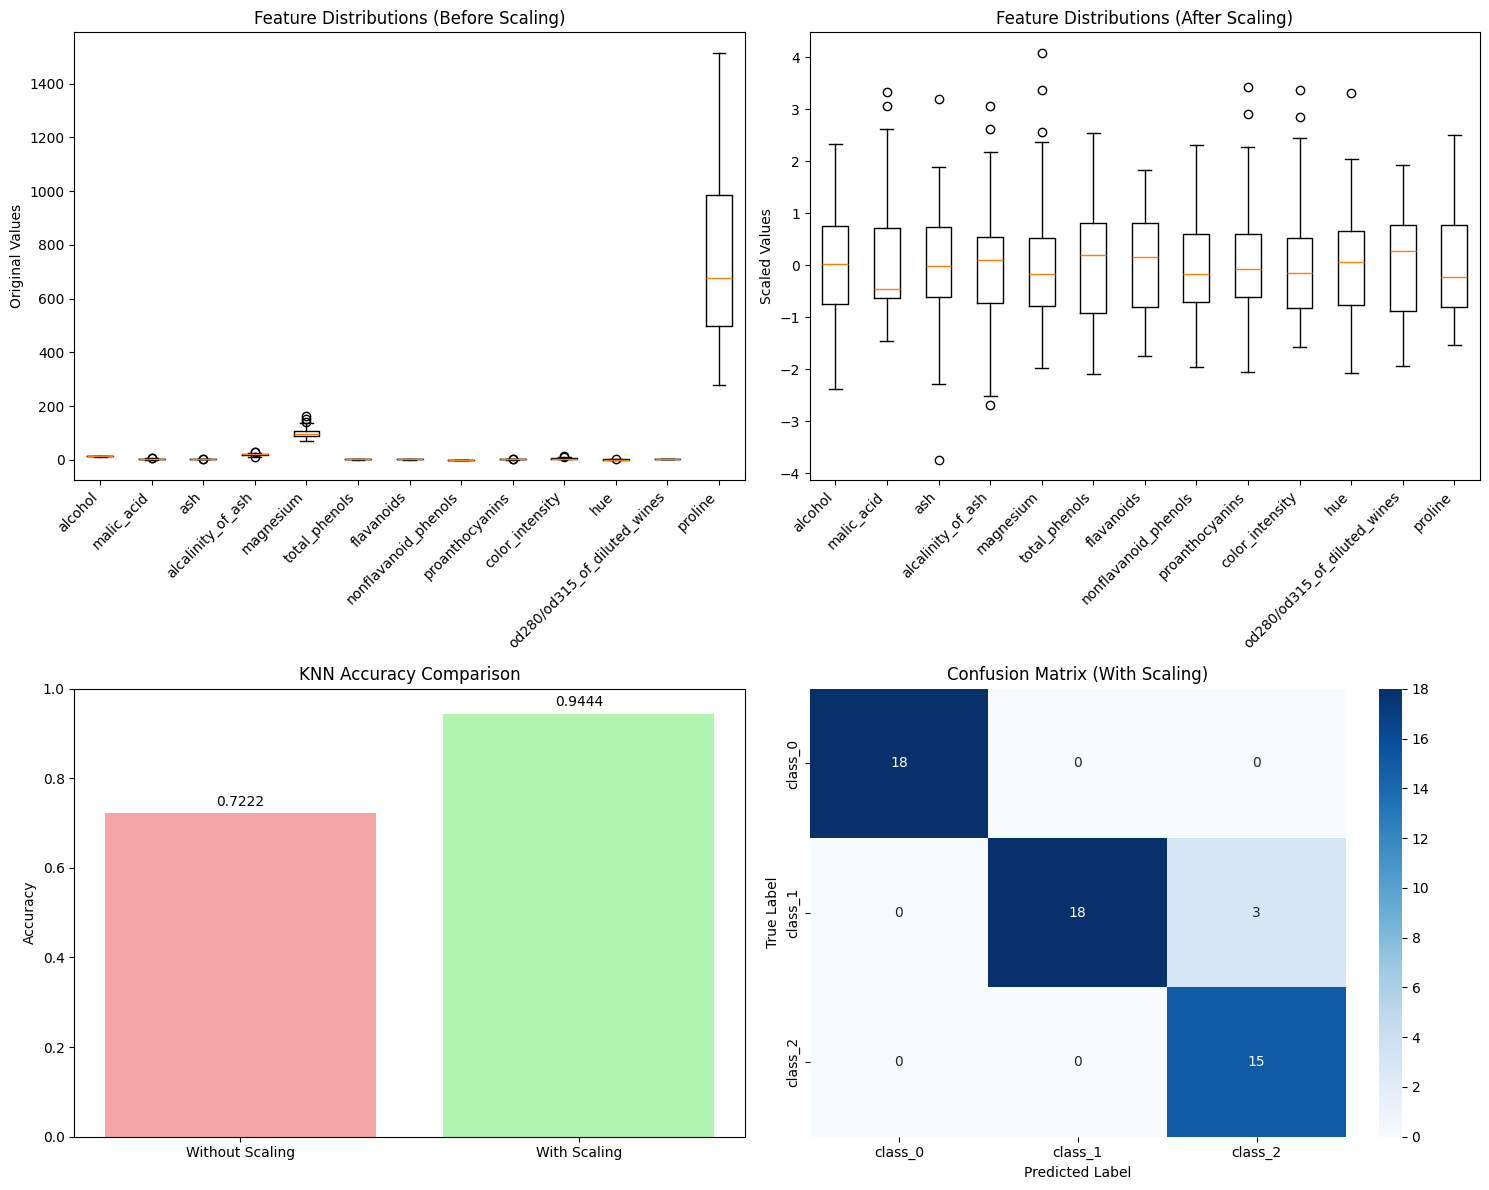


Testing different k values:
Best k without scaling: 7 (Accuracy: 0.7407)
Best k with scaling: 13 (Accuracy: 0.9815)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("\nFeature Statistics (Original Data):")
print(df.describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Train KNN without feature scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"\nKNN Accuracy WITHOUT Feature Scaling: {accuracy_unscaled:.4f}")
print("Classification Report (Unscaled):")
print(classification_report(y_test, y_pred_unscaled, target_names=target_names))

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create DataFrame for scaled data visualization
df_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
print("\nFeature Statistics (Scaled Data):")
print(df_scaled.describe())

# Train KNN with feature scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"\nKNN Accuracy WITH Feature Scaling: {accuracy_scaled:.4f}")
print("Classification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled, target_names=target_names))

# Compare results
print("\n" + "="*60)
print("COMPARISON RESULTS:")
print("="*60)
print(f"Accuracy without scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy with scaling:    {accuracy_scaled:.4f}")
print(f"Improvement:              {accuracy_scaled - accuracy_unscaled:.4f}")
print(f"Percentage improvement:   {(accuracy_scaled - accuracy_unscaled)/accuracy_unscaled*100:.2f}%")

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Feature distributions before scaling
axes[0, 0].boxplot(X_train)
axes[0, 0].set_title('Feature Distributions (Before Scaling)')
axes[0, 0].set_ylabel('Original Values')
axes[0, 0].set_xticklabels(feature_names, rotation=45, ha='right')

# Plot 2: Feature distributions after scaling
axes[0, 1].boxplot(X_train_scaled)
axes[0, 1].set_title('Feature Distributions (After Scaling)')
axes[0, 1].set_ylabel('Scaled Values')
axes[0, 1].set_xticklabels(feature_names, rotation=45, ha='right')

# Plot 3: Accuracy comparison
accuracies = [accuracy_unscaled, accuracy_scaled]
labels = ['Without Scaling', 'With Scaling']
colors = ['lightcoral', 'lightgreen']

bars = axes[1, 0].bar(labels, accuracies, color=colors, alpha=0.7)
axes[1, 0].set_title('KNN Accuracy Comparison')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{accuracy:.4f}', ha='center', va='bottom')

# Plot 4: Confusion matrix for scaled data (better performance)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_scaled)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix (With Scaling)')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Additional analysis: Test different k values
print("\nTesting different k values:")
k_values = range(1, 16)
accuracies_unscaled = []
accuracies_scaled = []

for k in k_values:
    # Without scaling
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    acc_unscaled = knn_temp.score(X_test, y_test)
    accuracies_unscaled.append(acc_unscaled)

    # With scaling
    knn_temp.fit(X_train_scaled, y_train)
    acc_scaled = knn_temp.score(X_test_scaled, y_test)
    accuracies_scaled.append(acc_scaled)

# Find best k for each case
best_k_unscaled = k_values[np.argmax(accuracies_unscaled)]
best_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"Best k without scaling: {best_k_unscaled} (Accuracy: {max(accuracies_unscaled):.4f})")
print(f"Best k with scaling: {best_k_scaled} (Accuracy: {max(accuracies_scaled):.4f})")

Question 7: Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

Dataset Information:
Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']

EXPLAINED VARIANCE RATIO FOR EACH PRINCIPAL COMPONENT
PC1: 0.3620 (36.20%) - Cumulative: 0.3620 (36.20%)
PC2: 0.1921 (19.21%) - Cumulative: 0.5541 (55.41%)
PC3: 0.1112 (11.12%) - Cumulative: 0.6653 (66.53%)
PC4: 0.0707 (7.07%) - Cumulative: 0.7360 (73.60%)
PC5: 0.0656 (6.56%) - Cumulative: 0.8016 (80.16%)
PC6: 0.0494 (4.94%) - Cumulative: 0.8510 (85.10%)
PC7: 0.0424 (4.24%) - Cumulative: 0.8934 (89.34%)
PC8: 0.0268 (2.68%) - Cumulative: 0.9202 (92.02%)
PC9: 0.0222 (2.22%) - Cumulative: 0.9424 (94.24%)
PC10: 0.0193 (1.93%) - Cumulative: 0.9617 (96.17%)
PC11: 0.0174 (1.74%) - Cumulative: 0.9791 (97.91%)
PC12: 0.0130 (1.30%) - Cumulative: 0.9920 (99.20%)

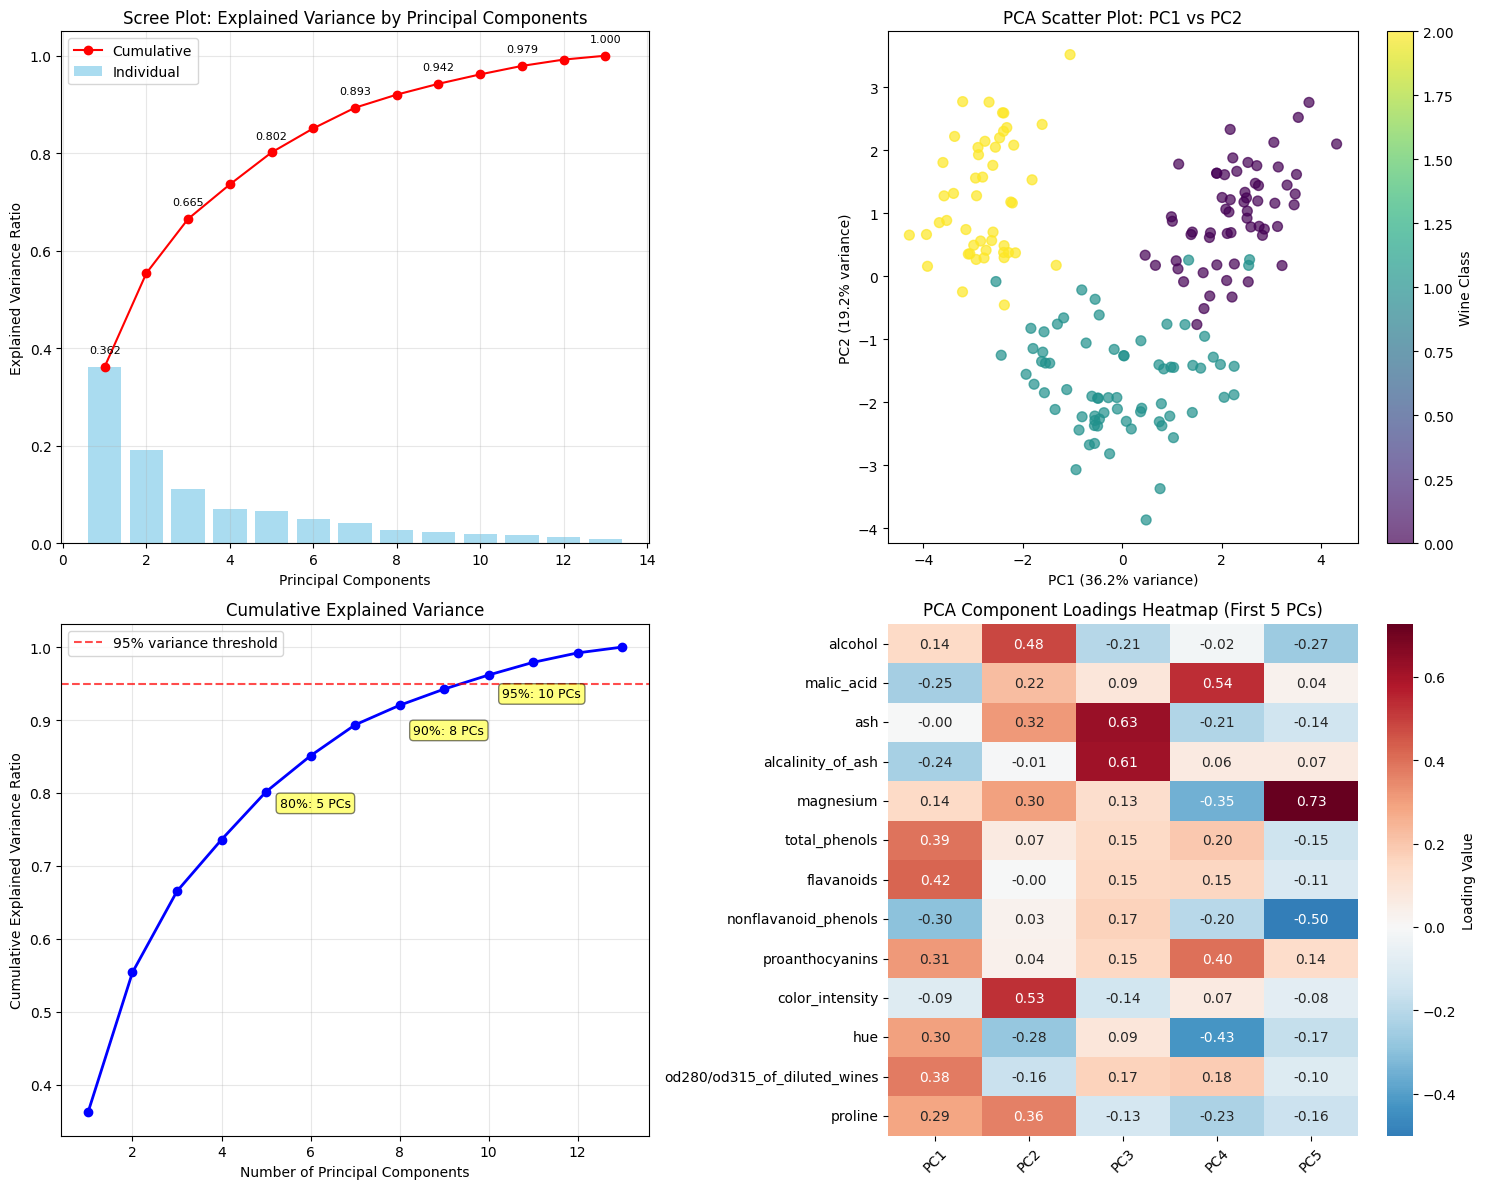


PCA ANALYSIS SUMMARY
Total variance explained by all components: 1.000000
Components needed for 80% variance: 5
Components needed for 90% variance: 8
Components needed for 95% variance: 10
Components needed for 99% variance: 12

First component explains: 36.20% of variance
First two components explain: 55.41% of variance
First three components explain: 66.53% of variance

Most influential features for PC1:
  flavanoids: 0.4229
  total_phenols: 0.3947
  od280/od315_of_diluted_wines: 0.3762


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the explained variance ratio for each principal component
print("\n" + "="*60)
print("EXPLAINED VARIANCE RATIO FOR EACH PRINCIPAL COMPONENT")
print("="*60)

for i, (var_ratio, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio), 1):
    print(f"PC{i}: {var_ratio:.4f} ({var_ratio*100:.2f}%) - Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Print component loadings (how original features contribute to PCs)
print("\n" + "="*60)
print("COMPONENT LOADINGS (First 5 Principal Components)")
print("="*60)

loadings = pca.components_
for i in range(5):  # Show first 5 PCs
    print(f"\nPrincipal Component {i+1}:")
    # Get indices of top 5 contributing features for this PC
    top_indices = np.argsort(np.abs(loadings[i]))[::-1][:5]
    for idx in top_indices:
        print(f"  {feature_names[idx]}: {loadings[i][idx]:.4f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scree plot (Variance explained by each PC)
components = range(1, len(explained_variance_ratio) + 1)
axes[0, 0].bar(components, explained_variance_ratio, alpha=0.7,
               color='skyblue', label='Individual')
axes[0, 0].plot(components, cumulative_variance_ratio, 'ro-',
                label='Cumulative')
axes[0, 0].set_xlabel('Principal Components')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('Scree Plot: Explained Variance by Principal Components')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add value labels for cumulative variance
for i, (x, y_val) in enumerate(zip(components, cumulative_variance_ratio)):
    if i % 2 == 0:  # Show every other label to avoid clutter
        axes[0, 0].annotate(f'{y_val:.3f}', (x, y_val), textcoords="offset points",
                           xytext=(0,10), ha='center', fontsize=8)

# Plot 2: PCA scatter plot (first two components)
# Ensure 'c' argument is in a format matplotlib expects
scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y.tolist(), cmap='viridis',
                            alpha=0.7, s=50)
axes[0, 1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
axes[0, 1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
axes[0, 1].set_title('PCA Scatter Plot: PC1 vs PC2')
plt.colorbar(scatter, ax=axes[0, 1], label='Wine Class')


# Plot 3: Cumulative variance
axes[1, 0].plot(components, cumulative_variance_ratio, 'bo-', linewidth=2)
axes[1, 0].set_xlabel('Number of Principal Components')
axes[1, 0].set_ylabel('Cumulative Explained Variance Ratio')
axes[1, 0].set_title('Cumulative Explained Variance')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0.95, color='r', linestyle='--', alpha=0.7,
                  label='95% variance threshold')
axes[1, 0].legend()

# Add annotations for key variance levels
for threshold in [0.80, 0.90, 0.95]:
    n_components = np.where(cumulative_variance_ratio >= threshold)[0][0] + 1
    axes[1, 0].annotate(f'{threshold*100:.0f}%: {n_components} PCs',
                       (n_components, threshold),
                       textcoords="offset points", xytext=(10,-10),
                       ha='left', fontsize=9,
                       bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

# Plot 4: Heatmap of component loadings (first 5 PCs)
loadings_df = pd.DataFrame(pca.components_[:5].T,
                          index=feature_names,
                          columns=[f'PC{i+1}' for i in range(5)])
sns.heatmap(loadings_df, cmap='RdBu_r', center=0, ax=axes[1, 1],
           annot=True, fmt='.2f', cbar_kws={'label': 'Loading Value'})
axes[1, 1].set_title('PCA Component Loadings Heatmap (First 5 PCs)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional analysis
print("\n" + "="*60)
print("PCA ANALYSIS SUMMARY")
print("="*60)
print(f"Total variance explained by all components: {sum(explained_variance_ratio):.6f}")

# Find number of components needed for different variance thresholds
thresholds = [0.80, 0.90, 0.95, 0.99]
for threshold in thresholds:
    n_components = np.where(cumulative_variance_ratio >= threshold)[0][0] + 1
    print(f"Components needed for {threshold*100:.0f}% variance: {n_components}")

# Check if PCA was effective
print(f"\nFirst component explains: {explained_variance_ratio[0]*100:.2f}% of variance")
print(f"First two components explain: {cumulative_variance_ratio[1]*100:.2f}% of variance")
print(f"First three components explain: {cumulative_variance_ratio[2]*100:.2f}% of variance")

# Most important features for first few components
print("\nMost influential features for PC1:")
pc1_loadings = pca.components_[0]
top_pc1_indices = np.argsort(np.abs(pc1_loadings))[::-1][:3]
for idx in top_pc1_indices:
    print(f"  {feature_names[idx]}: {pc1_loadings[idx]:.4f}")

Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.

Dataset Information:
Number of samples: 178
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

PCA with 2 components explains 0.5494 (54.94%) of total variance
PC1: 0.3573 (35.73%)
PC2: 0.1921 (19.21%)

KNN CLASSIFIER PERFORMANCE COMPARISON
Accuracy on original dataset (13 features): 0.9444
Accuracy on PCA dataset (2 components):    0.9444
Difference: +0.0000

Classification Report - Original Dataset:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Classification Report - PCA Dataset (2 components):
              precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        18
 

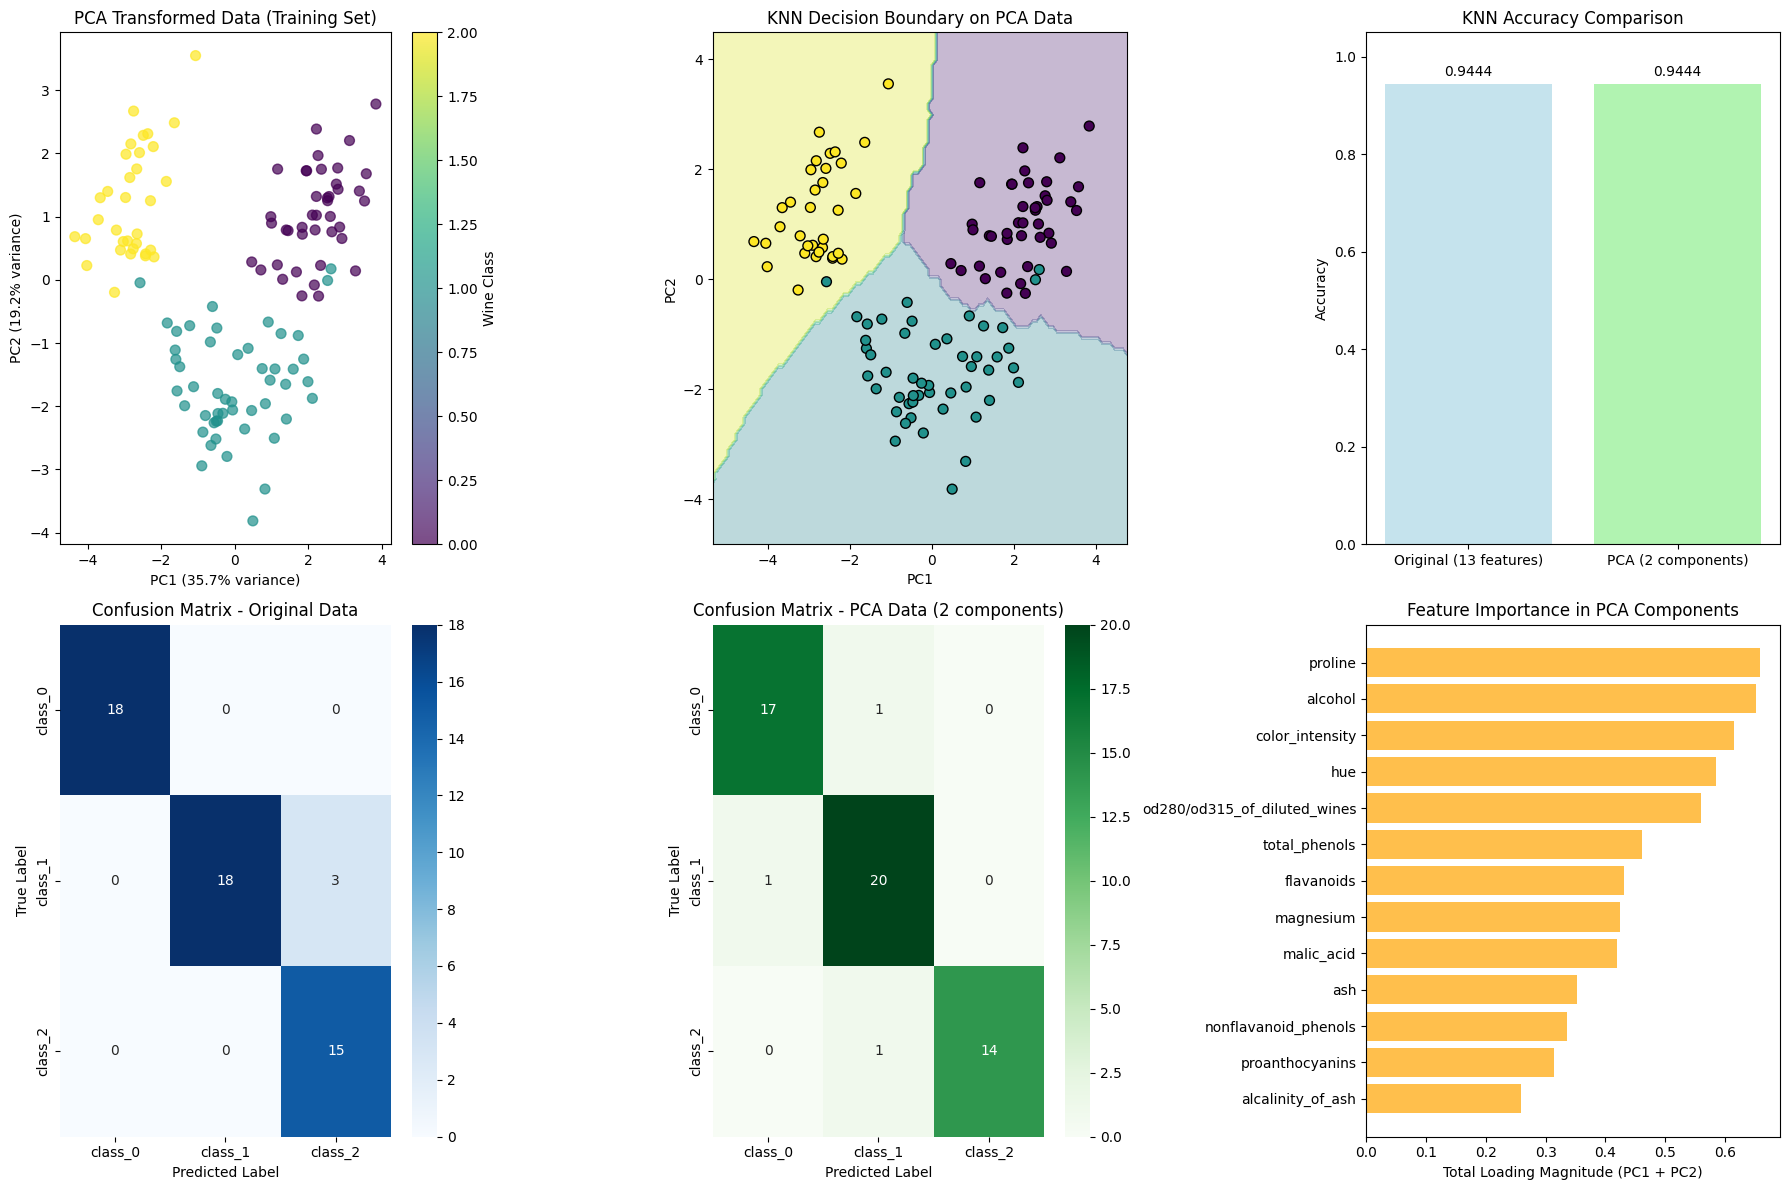


ANALYSIS WITH DIFFERENT K VALUES
Best k for original data: 13 (Accuracy: 0.9815)
Best k for PCA data: 10 (Accuracy: 0.9630)


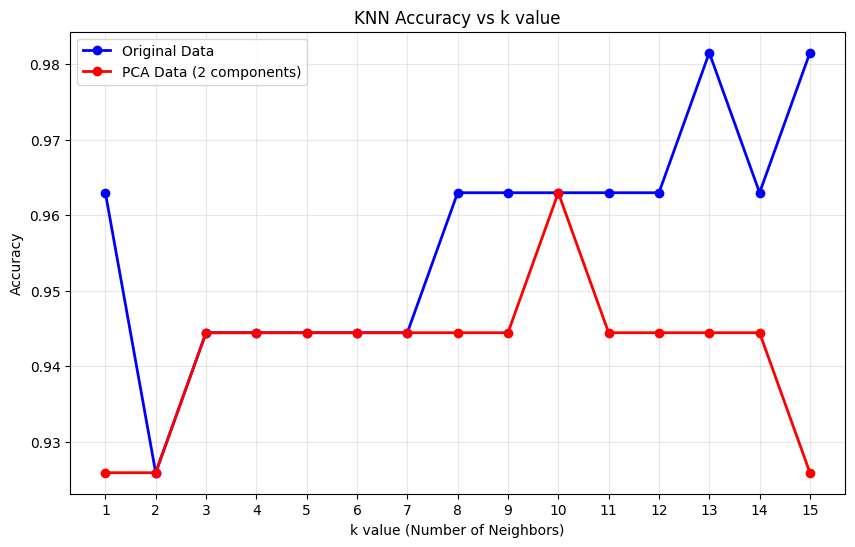


Dimensionality Reduction:
Original features: 13
PCA components: 2
Reduction: 84.6% fewer dimensions
Variance retained: 54.9%

Performance Summary:
Accuracy with 13 features: 0.9444
Accuracy with 2 PCA components: 0.9444
Performance change: +0.0%


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA and retain top 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get explained variance information
explained_variance = pca.explained_variance_ratio_
cumulative_variance = sum(explained_variance)

print(f"\nPCA with 2 components explains {cumulative_variance:.4f} ({cumulative_variance*100:.2f}%) of total variance")
print(f"PC1: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"PC2: {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")

# Train KNN on original scaled data (for comparison)
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print comparison results
print("\n" + "="*70)
print("KNN CLASSIFIER PERFORMANCE COMPARISON")
print("="*70)
print(f"Accuracy on original dataset (13 features): {accuracy_original:.4f}")
print(f"Accuracy on PCA dataset (2 components):    {accuracy_pca:.4f}")
print(f"Difference: {accuracy_pca - accuracy_original:+.4f}")

print("\nClassification Report - Original Dataset:")
print(classification_report(y_test, y_pred_original, target_names=target_names))

print("Classification Report - PCA Dataset (2 components):")
print(classification_report(y_test, y_pred_pca, target_names=target_names))

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: PCA-transformed data visualization
scatter = axes[0, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,
                            cmap='viridis', alpha=0.7, s=50)
axes[0, 0].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
axes[0, 0].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
axes[0, 0].set_title('PCA Transformed Data (Training Set)')
plt.colorbar(scatter, ax=axes[0, 0], label='Wine Class')

# Plot 2: Decision boundary for PCA KNN
def plot_decision_boundary_pca(ax, model, X, y):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict for each point in mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                        edgecolors='k', s=50)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('KNN Decision Boundary (PCA Data)')
    return scatter

plot_decision_boundary_pca(axes[0, 1], knn_pca, X_train_pca, y_train)
axes[0, 1].set_title('KNN Decision Boundary on PCA Data')

# Plot 3: Accuracy comparison
models = ['Original (13 features)', 'PCA (2 components)']
accuracies = [accuracy_original, accuracy_pca]
colors = ['lightblue', 'lightgreen']

bars = axes[0, 2].bar(models, accuracies, color=colors, alpha=0.7)
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].set_title('KNN Accuracy Comparison')
axes[0, 2].set_ylim(0, 1.05)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{accuracy:.4f}', ha='center', va='bottom')

# Plot 4: Confusion matrix for original data
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names,
            ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Original Data')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Plot 5: Confusion matrix for PCA data
cm_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names,
            ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - PCA Data (2 components)')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

# Plot 6: Feature importance in PCA components
loadings = pca.components_
feature_importance = np.abs(loadings).sum(axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

axes[1, 2].barh(range(len(sorted_idx)), feature_importance[sorted_idx],
                color='orange', alpha=0.7)
axes[1, 2].set_yticks(range(len(sorted_idx)))
axes[1, 2].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1, 2].set_xlabel('Total Loading Magnitude (PC1 + PC2)')
axes[1, 2].set_title('Feature Importance in PCA Components')
axes[1, 2].invert_yaxis()  # Most important at top

plt.tight_layout()
plt.show()

# Additional analysis: Test different k values for both approaches
print("\n" + "="*60)
print("ANALYSIS WITH DIFFERENT K VALUES")
print("="*60)

k_values = range(1, 16)
accuracies_original_k = []
accuracies_pca_k = []

for k in k_values:
    # Original data
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    acc_original = knn_temp.score(X_test_scaled, y_test)
    accuracies_original_k.append(acc_original)

    # PCA data
    knn_temp.fit(X_train_pca, y_train)
    acc_pca = knn_temp.score(X_test_pca, y_test)
    accuracies_pca_k.append(acc_pca)

# Find best k for each approach
best_k_original = k_values[np.argmax(accuracies_original_k)]
best_k_pca = k_values[np.argmax(accuracies_pca_k)]

print(f"Best k for original data: {best_k_original} (Accuracy: {max(accuracies_original_k):.4f})")
print(f"Best k for PCA data: {best_k_pca} (Accuracy: {max(accuracies_pca_k):.4f})")

# Plot k-value comparison
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_original_k, 'bo-', label='Original Data', linewidth=2)
plt.plot(k_values, accuracies_pca_k, 'ro-', label='PCA Data (2 components)', linewidth=2)
plt.xlabel('k value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Dimensionality reduction benefits
print(f"\nDimensionality Reduction:")
print(f"Original features: 13")
print(f"PCA components: 2")
print(f"Reduction: {11/13*100:.1f}% fewer dimensions")
print(f"Variance retained: {cumulative_variance*100:.1f}%")

# Performance analysis
print(f"\nPerformance Summary:")
print(f"Accuracy with 13 features: {accuracy_original:.4f}")
print(f"Accuracy with 2 PCA components: {accuracy_pca:.4f}")
print(f"Performance change: {(accuracy_pca/accuracy_original - 1)*100:+.1f}%")

Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.

Dataset Information:
Number of samples: 178
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

Training KNN with euclidean distance...
  Accuracy: 0.9444
  Training time: 0.0010 seconds
  Prediction time: 0.0021 seconds

Training KNN with manhattan distance...
  Accuracy: 0.9815
  Training time: 0.0008 seconds
  Prediction time: 0.0018 seconds

Training KNN with chebyshev distance...
  Accuracy: 0.8889
  Training time: 0.0013 seconds
  Prediction time: 0.0022 seconds

Training KNN with minkowski distance...
  Accuracy: 0.9259
  Training time: 0.0008 seconds
  Prediction time: 0.0038 seconds

KNN PERFORMANCE COMPARISON WITH DIFFERENT DISTANCE METRICS
EUCLIDEAN      : 0.9444
MANHATTAN      : 0.9815
CHEBYSHEV      : 0.8889
MINKOWSKI      : 0.9259

Best performing metric: MANHATTAN (0.9815)

CROSS-VALIDATION RESULTS (5-fold)
EUCLIDEAN      : 0.9673 ± 0.0310
MANHATTAN      : 0.9753 ± 0.0332
CHEBYSHEV      : 0.9277 ± 0.0464
MINKOWSKI      :

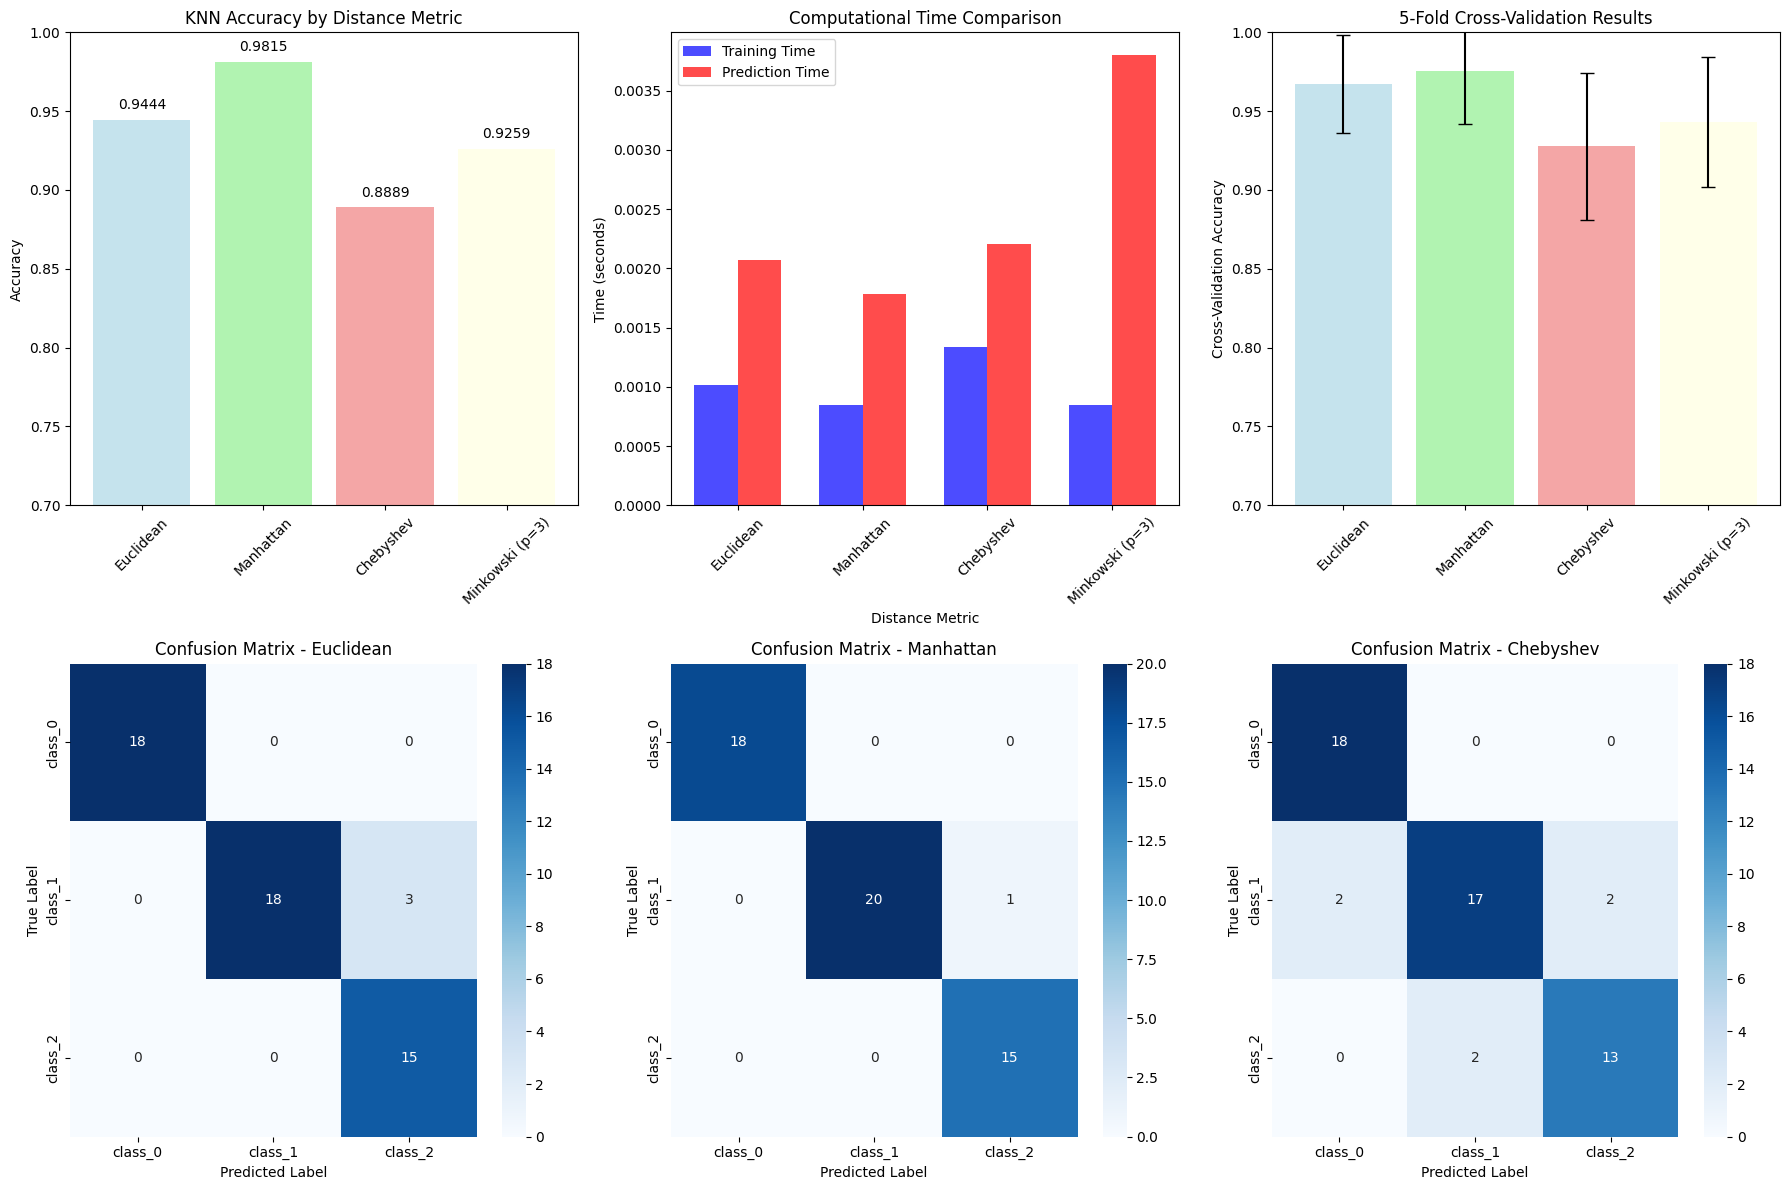


ANALYSIS WITH DIFFERENT K VALUES FOR TOP METRICS
EUCLIDEAN   : Best k=13, Accuracy=0.9815
MANHATTAN   : Best k=4, Accuracy=0.9815


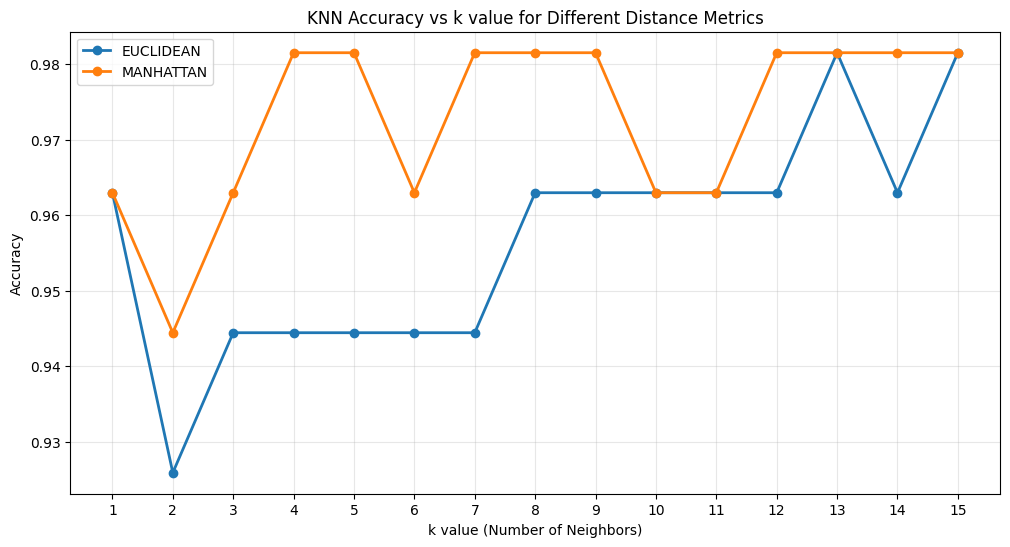


DISTANCE METRIC CHARACTERISTICS
Euclidean (L2):
  - Most commonly used
  - Sensitive to large differences in single dimensions
  - Good for continuous variables with similar scales

Manhattan (L1):
  - Less sensitive to outliers than Euclidean
  - Better for high-dimensional data
  - Often performs well with standardized data

Chebyshev (L∞):
  - Measures maximum coordinate difference
  - Very sensitive to extreme values
  - Useful when worst-case difference matters most

Minkowski:
  - Generalized distance (p=2 → Euclidean, p=1 → Manhattan)
  - Flexible but requires parameter tuning

STATISTICAL SIGNIFICANCE TEST (Paired t-test using StratifiedKFold)
Paired t-test (Euclidean vs Manhattan):
  t-statistic: -1.5000
  p-value: 0.2080
  No significant difference at α=0.05


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean, cityblock
import time
from scipy.stats import ttest_rel # Import ttest_rel

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Standardize the data (important for distance-based metrics)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric_names = ['Euclidean', 'Manhattan', 'Chebyshev', 'Minkowski (p=3)']

# Train KNN with different distance metrics
results = {}
training_times = {}
predict_times = {}

for metric in distance_metrics:
    print(f"\nTraining KNN with {metric} distance...")

    # Set p parameter for Minkowski distance
    p_param = 3 if metric == 'minkowski' else None

    # Train and time the model
    start_time = time.time()
    if p_param:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=p_param)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)

    knn.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    training_times[metric] = training_time

    # Predict and time
    start_time = time.time()
    y_pred = knn.predict(X_test_scaled)
    predict_time = time.time() - start_time
    predict_times[metric] = predict_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Training time: {training_time:.4f} seconds")
    print(f"  Prediction time: {predict_time:.4f} seconds")

# Print comparison results
print("\n" + "="*70)
print("KNN PERFORMANCE COMPARISON WITH DIFFERENT DISTANCE METRICS")
print("="*70)

for metric, accuracy in results.items():
    print(f"{metric.upper():<15}: {accuracy:.4f}")

# Find best performing metric
best_metric = max(results, key=results.get)
best_accuracy = results[best_metric]
print(f"\nBest performing metric: {best_metric.upper()} ({best_accuracy:.4f})")

# Cross-validation for more robust comparison
print("\n" + "="*70)
print("CROSS-VALIDATION RESULTS (5-fold)")
print("="*70)

cv_results = {}
for metric in distance_metrics:
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=3)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)

    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    cv_results[metric] = (cv_mean, cv_std)

    print(f"{metric.upper():<15}: {cv_mean:.4f} ± {cv_std:.4f}")

# Create detailed visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Accuracy comparison
accuracies = [results[metric] for metric in distance_metrics]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

bars = axes[0, 0].bar(metric_names, accuracies, color=colors, alpha=0.7)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('KNN Accuracy by Distance Metric')
axes[0, 0].set_ylim(0.7, 1.0)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{accuracy:.4f}', ha='center', va='bottom')

# Plot 2: Training and prediction times
training_times_list = [training_times[metric] for metric in distance_metrics]
predict_times_list = [predict_times[metric] for metric in distance_metrics]

x_pos = np.arange(len(metric_names))
width = 0.35

axes[0, 1].bar(x_pos - width/2, training_times_list, width,
               label='Training Time', alpha=0.7, color='blue')
axes[0, 1].bar(x_pos + width/2, predict_times_list, width,
               label='Prediction Time', alpha=0.7, color='red')
axes[0, 1].set_xlabel('Distance Metric')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('Computational Time Comparison')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(metric_names, rotation=45)
axes[0, 1].legend()

# Plot 3: Cross-validation results
cv_means = [cv_results[metric][0] for metric in distance_metrics]
cv_stds = [cv_results[metric][1] for metric in distance_metrics]

bars = axes[0, 2].bar(metric_names, cv_means, yerr=cv_stds,
                     capsize=5, alpha=0.7, color=colors)
axes[0, 2].set_ylabel('Cross-Validation Accuracy')
axes[0, 2].set_title('5-Fold Cross-Validation Results')
axes[0, 2].set_ylim(0.7, 1.0)
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot 4-6: Confusion matrices for each metric
for i, metric in enumerate(distance_metrics[:3]):  # Show first 3 metrics
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=3)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)

    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    row = 1
    col = i
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names,
                ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix - {metric_names[i]}')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Additional analysis: Test different k values for best metrics
print("\n" + "="*70)
print("ANALYSIS WITH DIFFERENT K VALUES FOR TOP METRICS")
print("="*70)

k_values = range(1, 16)
top_metrics = ['euclidean', 'manhattan']  # Focus on top two

plt.figure(figsize=(12, 6))
for metric in top_metrics:
    accuracies_k = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)
        accuracies_k.append(accuracy)

    plt.plot(k_values, accuracies_k, 'o-', label=f'{metric.upper()}', linewidth=2)

    best_k = k_values[np.argmax(accuracies_k)]
    best_acc = max(accuracies_k)
    print(f"{metric.upper():<12}: Best k={best_k}, Accuracy={best_acc:.4f}")

plt.xlabel('k value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k value for Different Distance Metrics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Distance metric characteristics comparison
print("\n" + "="*70)
print("DISTANCE METRIC CHARACTERISTICS")
print("="*70)
print("Euclidean (L2):")
print("  - Most commonly used")
print("  - Sensitive to large differences in single dimensions")
print("  - Good for continuous variables with similar scales")

print("\nManhattan (L1):")
print("  - Less sensitive to outliers than Euclidean")
print("  - Better for high-dimensional data")
print("  - Often performs well with standardized data")

print("\nChebyshev (L∞):")
print("  - Measures maximum coordinate difference")
print("  - Very sensitive to extreme values")
print("  - Useful when worst-case difference matters most")

print("\nMinkowski:")
print("  - Generalized distance (p=2 → Euclidean, p=1 → Manhattan)")
print("  - Flexible but requires parameter tuning")

# Statistical significance test
# Use StratifiedKFold to generate consistent splits for paired test
from sklearn.model_selection import StratifiedKFold

print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE TEST (Paired t-test using StratifiedKFold)")
print("="*70)

# Use StratifiedKFold for more reliable cross-validation scores for the t-test
n_splits = 5 # You can adjust this
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

euclidean_scores = []
manhattan_scores = []

for train_index, test_index in skf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # Euclidean
    knn_euc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_euc.fit(X_train_cv, y_train_cv)
    acc_euc = knn_euc.score(X_test_cv, y_test_cv)
    euclidean_scores.append(acc_euc)

    # Manhattan
    knn_man = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
    knn_man.fit(X_train_cv, y_train_cv)
    acc_man = knn_man.score(X_test_cv, y_test_cv)
    manhattan_scores.append(acc_man)

# Paired t-test
t_stat, p_value = ttest_rel(euclidean_scores, manhattan_scores)
print(f"Paired t-test (Euclidean vs Manhattan):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print("  Significant difference at α=0.05")
else:
    print("  No significant difference at α=0.05")

Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:

● Use PCA to reduce dimensionality

● Decide how many components to keep

● Use KNN for classification post-dimensionality reduction

● Evaluate the model

● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data.


**Answer:**


You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer. Due to the large number of features and a small number of samples, traditional models overfit. Explain how you would:

*   Use PCA to reduce dimensionality
*   Decide how many components to keep
*   Use KNN for classification post-dimensionality reduction
*   Evaluate the model
*   Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data.

---

**Explanation:**

Here's how you would approach this problem using PCA and KNN:

**1. Use PCA to reduce dimensionality:**

*   **Standardization:** The first crucial step is to standardize the gene expression data. Gene expression values can vary significantly in scale, and distance-based algorithms like KNN and techniques like PCA are sensitive to this scale. `StandardScaler` from scikit-learn would be used to transform the data so that each gene has a mean of 0 and a standard deviation of 1.
*   **Apply PCA:** Apply PCA to the standardized data. PCA will find a new set of uncorrelated components (linear combinations of the original genes) that capture the maximum variance in the dataset. These components are ordered by the amount of variance they explain.

**2. Decide how many components to keep:**

This is a critical step in balancing dimensionality reduction with information retention. Several methods can be used:

*   **Explained Variance Plot (Scree Plot):** Plot the explained variance ratio for each principal component and the cumulative explained variance. Look for an "elbow point" in the cumulative variance plot, where the curve starts to flatten out. The number of components before the elbow is often a good indicator of how many components capture most of the meaningful variance.
*   **Cumulative Explained Variance Threshold:** Decide on a threshold of variance you want to retain (e.g., 95% or 99%). Select the minimum number of components that explain at least this much cumulative variance.
*   **Cross-validation:** Train the downstream model (KNN) using different numbers of principal components and evaluate the model's performance (e.g., accuracy, F1-score) using cross-validation. Choose the number of components that yields the best performance. This is often the most data-driven approach.
*   **Domain Knowledge:** In biomedical data, there might be existing knowledge about the expected dimensionality or important biological pathways, which could guide the choice of components.

**3. Use KNN for classification post-dimensionality reduction:**

*   **Transform Data:** Once the optimal number of principal components is determined, transform both the training and testing datasets using the fitted PCA model, keeping only the selected number of components.
*   **Train KNN:** Train a KNN classifier on this reduced-dimensional data. Choose an appropriate value for 'k' (the number of neighbors) and a distance metric (like Euclidean or Manhattan). Cross-validation on the PCA-transformed training data can help tune the 'k' value.

**4. Evaluate the model:**

Evaluate the performance of the KNN model trained on the PCA-transformed data using a separate test set that was not used during training or PCA fitting. Key evaluation metrics for cancer classification would include:

*   **Accuracy:** Overall correct predictions.
*   **Precision, Recall, F1-score:** These are particularly important in imbalanced datasets (where some cancer types are much rarer than others) to assess the model's ability to correctly identify each class.
*   **Confusion Matrix:** Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each cancer type.
*   **AUC-ROC curve:** Measures the model's ability to distinguish between different classes.

**5. Justify this pipeline to your stakeholders:**

*   **Addresses the "Curse of Dimensionality":** Explain that high-dimensional data with limited samples leads to overfitting and poor generalization. PCA effectively tackles this by reducing the number of features while retaining most of the essential information.
*   **Reduces Noise and Redundancy:** PCA helps filter out noisy or redundant features, leading to a more robust model.
*   **Improved Computational Efficiency:** Training KNN on fewer dimensions is significantly faster and requires less memory, which is important for large gene expression datasets.
*   **Enhanced Model Performance:** Demonstrate the improved performance (using evaluation metrics like accuracy and F1-score) of the PCA+KNN pipeline compared to training KNN on the original high-dimensional data (which would likely overfit).
*   **Interpretability (Partial):** While PCA components are abstract, you can analyze the component loadings to understand which original genes contribute most to the principal components, providing some biological insights. The KNN model itself is relatively simple and interpretable once the reduced feature space is defined.
*   **Robustness:** Explain that standardizing the data and using cross-validation for model tuning and evaluation makes the pipeline more robust and less sensitive to the specific data split.
*   **Proven Techniques:** Both PCA and KNN are well-established and widely used machine learning techniques, which can build confidence with stakeholders.

By explaining these steps and justifications, you can effectively communicate the value of using a PCA+KNN pipeline for cancer classification on high-dimensional gene expression data to your stakeholders.